In [1]:
import pandas as pd 
import warnings as wr 
wr.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('/kaggle/input/hightw/weight-height - weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
df.Gender = le.fit_transform(df[['Gender']])

In [5]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [6]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Go Ahead

In [7]:

X = df.drop(['Weight'],axis=1)
Y = df[['Weight']]

In [8]:
X.shape

(8555, 2)

In [9]:
Y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size = 0.70 , random_state = 42)

# EDA

Text(0, 0.5, 'ytrain')

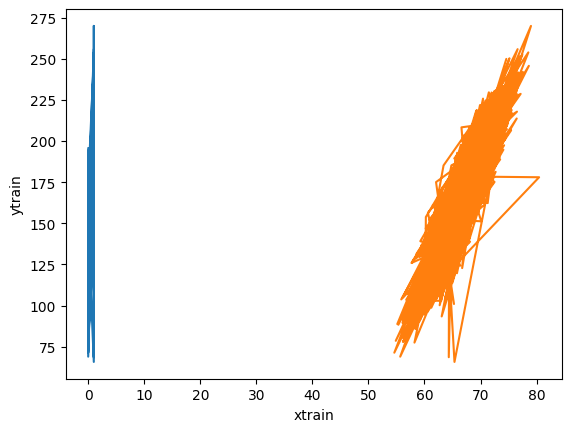

In [11]:
import matplotlib.pyplot as plt

plt.plot(xtrain,ytrain)
plt.xlabel("xtrain")
plt.ylabel("ytrain")

# Least Squared Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
LG = LinearRegression()

In [13]:
LG.fit(xtrain,ytrain)

LinearRegression()

In [14]:
LG.predict(xtest)

array([[142.44868114],
       [186.0517281 ],
       [198.42283706],
       ...,
       [102.94080643],
       [190.83713617],
       [143.34786753]])

In [15]:
LG.score(xtest,ytest)

0.905911242442266

In [16]:
LG.score(xtrain,ytrain)

0.8973793060969246

In [17]:
predicted = LG.predict(xtest)

In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest,predicted)
mse

96.83734437830608

# Regression Problem

In [19]:
#kNN regressor
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
KNR.fit(xtrain,ytrain)


KNeighborsRegressor()

In [20]:
KNR.score(xtest,ytest)

0.8821086423439015

In [21]:
#kNN with distance
KNR2 = KNeighborsRegressor(weights = 'distance')
KNR2.fit(xtrain,ytrain)

KNeighborsRegressor(weights='distance')

In [22]:
KNR2.score(xtest,ytest) #uniform better

0.8599135905481368

In [23]:
#neighbors increase 
KNR3 = KNeighborsRegressor(n_neighbors=100,weights = 'uniform')
KNR3.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=100)

In [24]:
KNR3.score(xtest,ytest)

0.903816678517811

# Classification Problem

In [25]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [26]:
Xs = df.drop(['Gender'],axis = 1)
Ys = df[['Gender']]

In [27]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(Xs,Ys, train_size = 0.70 , random_state = 42)

In [28]:
#kNN Classification

from sklearn.neighbors import KNeighborsClassifier
KNS = KNeighborsClassifier()
KNS.fit(xtrain2,ytrain2)
KNS.score(xtest2,ytest2)

0.9131281651733542

In [29]:
KNS2 = KNeighborsClassifier(weights = 'distance')
KNS2.fit(xtrain2,ytrain2)
KNS2.score(xtest2,ytest2)

0.9026100506427737

In [30]:
KNS2 = KNeighborsClassifier(n_neighbors=41,weights = 'distance')
KNS2.fit(xtrain2,ytrain2)
KNS2.score(xtest2,ytest2)

0.9197506817296455

In [31]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xtrain2,ytrain2)

LogisticRegression()

In [32]:
LR.score(xtest2,ytest2)

0.9185820023373588

# Comparison of Linear Rgeression and KNN Regressor

With this data the score of Linear Regression is : 90.59112424422659 %
With this data the score of kNN Regressor is : 90.3816678517811 %


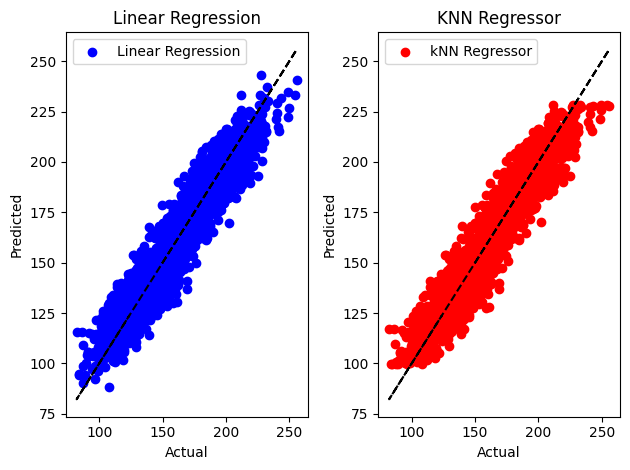

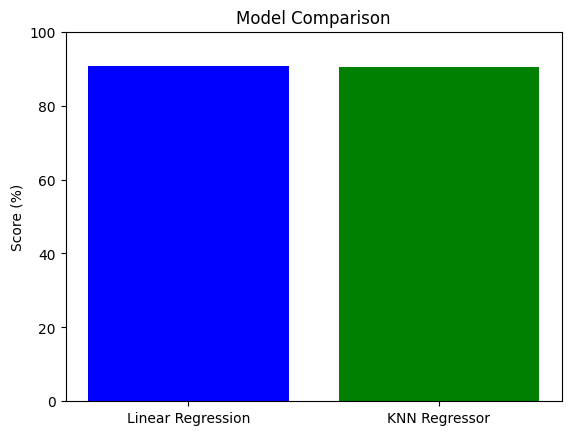

In [33]:
lgscore = LG.score(xtest,ytest)
knnregscore = KNR3.score(xtest,ytest)
y_pred_lg = LG.predict(xtest)
y_pred_knnr = KNR3.predict(xtest)
print("With this data the score of Linear Regression is : {} %".format(lgscore*100))
print("With this data the score of kNN Regressor is : {} %".format(knnregscore*100))


#plot

#plot linear regression
plt.subplot(1, 2, 1)
plt.scatter(ytest, y_pred_lg, color='blue', label='Linear Regression')
plt.plot(ytest, ytest, color='black', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.legend()
#plot KNN
plt.subplot(1,2,2)
plt.scatter(ytest, y_pred_knnr, color='red',label='kNN Regressor')
plt.plot(ytest,ytest,color = 'black',linestyle='--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("KNN Regressor")
plt.legend()

plt.tight_layout()
plt.show()

models = ['Linear Regression', 'KNN Regressor']
scores = [lgscore * 100, knnregscore * 100]

plt.bar(models, scores, color=['blue', 'green'])
plt.ylabel('Score (%)')
plt.title('Model Comparison')
plt.ylim(0, 100)
plt.show()


# Comparison of Logistic Rgeression and KNN Classifier

In [34]:
ytrain2.shape

(5988, 1)

With this data the score of Logistic regression is : 91.86 %
With this data the score of kNN Classifier is : 91.98 %


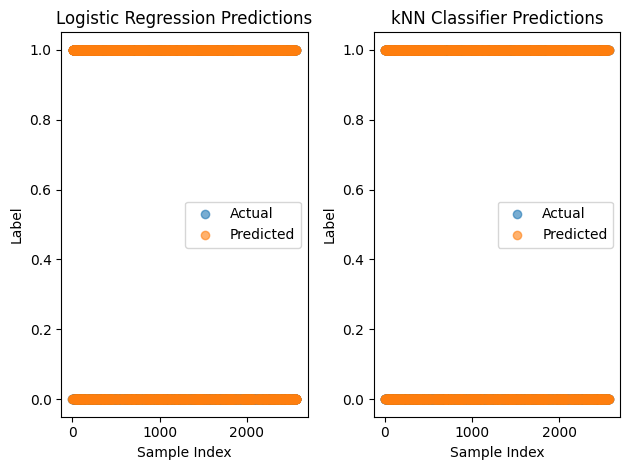

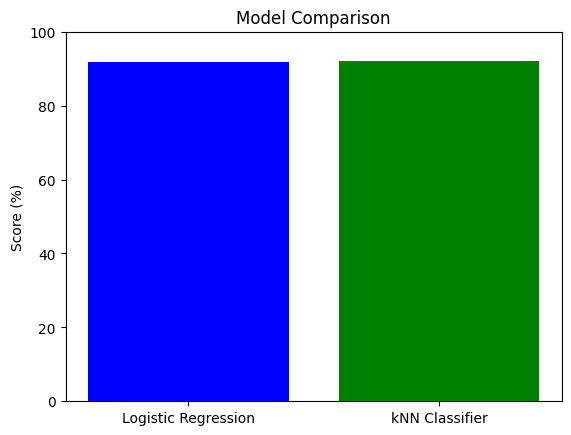

In [35]:
# Compute scores
logisticscore = LR.score(xtest2, ytest2)
knnclassscore = KNS2.score(xtest2, ytest2)

# Predict
y_pred_logistic = (LR.predict_proba(xtest2)[:, 1] >= 0.5).astype(int)
y_pred_knnc = KNS2.predict(xtest2)

# Print scores
print("With this data the score of Logistic regression is : {:.2f} %".format(logisticscore * 100))
print("With this data the score of kNN Classifier is : {:.2f} %".format(knnclassscore * 100))

# Plot Logistic Regression
plt.subplot(1, 2, 1)
plt.scatter(range(len(ytest2)), ytest2, label='Actual', alpha=0.6)
plt.scatter(range(len(ytest2)), y_pred_logistic, label='Predicted', alpha=0.6)
plt.title("Logistic Regression Predictions")
plt.xlabel("Sample Index")
plt.ylabel("Label")
plt.legend()

# Plot kNN Classifier
plt.subplot(1, 2, 2)
plt.scatter(range(len(ytest2)), ytest2, label='Actual', alpha=0.6)
plt.scatter(range(len(ytest2)), y_pred_knnc, label='Predicted', alpha=0.6)
plt.title("kNN Classifier Predictions")
plt.xlabel("Sample Index")
plt.ylabel("Label")
plt.legend()

plt.tight_layout()
plt.show()

models = ['Logistic Regression', 'kNN Classifier']
scores = [logisticscore * 100, knnclassscore * 100]

plt.bar(models, scores, color=['blue', 'green'])
plt.ylabel('Score (%)')
plt.title('Model Comparison')
plt.ylim(0, 100)
plt.show()
